In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [2]:
# Importing the dataset
dataset = pd.read_csv('dataset.csv')

# Print head and tail of the dataset
dataset

,branch_addr,taken,history
0,6ffcd6e7c25b,1,1
1,6ffcd6e7c27b,1,"1,1"
2,6ffcd6e7c275,0,"1,1,0"
3,6ffcd6e7c27b,1,"1,1,0,1"
4,6ffcd6e7c275,0,"1,1,0,1,0"
...,...,...,...
305986,6ffcc3296999,0,"1,0,0,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0"
305987,6ffcc3298e85,1,"0,0,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1"
305988,6ffcc32969c9,0,"0,1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0"
305989,6ffcc3247b74,1,"1,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1"


In [3]:
# Check for missing values
dataset.isnull().sum() # No missing values exist

branch_addr    0
taken          0
history        0
dtype: int64

<Axes: title={'center': 'Outcome distribution'}, xlabel='taken'>

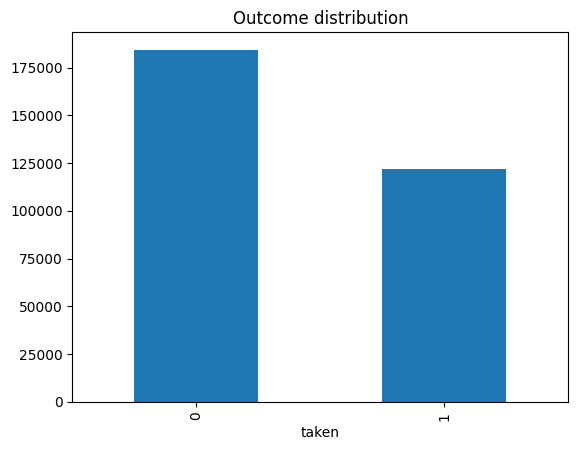

In [4]:
dataset["taken"].value_counts().plot.bar(title="Outcome distribution")

In [5]:
dataset.describe()

,taken
count,305991.000000
mean,0.397714
std,0.489427
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
# Convert 'history' column to numeric arrays
dataset['history'] = dataset['history'].str.split(',').apply(lambda x: [int(i) for i in x])

# Further processing if you need to create histogram based on individual element frequencies
# all_history_values = list(itertools.chain.from_iterable(dataset['history']))
# plt.hist(all_history_values, bins=20)
# plt.title("Distribution of History Values")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.show()

In [7]:
dataset['history']

0                                                       [1]
1                                                    [1, 1]
2                                                 [1, 1, 0]
3                                              [1, 1, 0, 1]
4                                           [1, 1, 0, 1, 0]
                                ...                        
305986    [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, ...
305987    [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, ...
305988    [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...
305989    [1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...
305990    [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, ...
Name: history, Length: 305991, dtype: object

In [8]:
# Add a new column named position

dataset.insert(0, 'position', range(1, len(dataset) + 1))

# Using direct assignment:
dataset['position'] = range(1, len(dataset) + 1)

In [9]:
# Split the dataset into train/test (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('taken', axis=1), dataset['taken'], test_size=0.2, random_state=None, shuffle=False)

In [10]:
y_train

0         1
1         1
2         0
3         1
4         0
         ..
244787    0
244788    0
244789    0
244790    0
244791    1
Name: taken, Length: 244792, dtype: int64

In [11]:
X_train.shape

(244792, 3)

In [12]:
X_train['branch_addr'] = X_train['branch_addr'].apply(lambda x: int(x, 16))

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

# One-hot encode the 'history' column
mlb = MultiLabelBinarizer()
history_encoded = mlb.fit_transform(X_train['history'])

# Create a new DataFrame for the encoded history
history_encoded_df = pd.DataFrame(history_encoded, columns=mlb.classes_, index=X_train.index)

# Drop the 'position', and 'history' columns and concatenate the encoded history
X_train_new = pd.concat([X_train.drop(columns=['position', 'history']), history_encoded_df], axis=1)

clf = SVC(verbose=True)          # SVC will print iteration progress itself
# clf.fit(X_train_new[:2000], y_train[:2000])

In [14]:
# One-hot encode the 'history' column
mlb = MultiLabelBinarizer()
history_encoded = mlb.fit_transform(X_test['history'])

# Create a new DataFrame for the encoded history
history_encoded_df = pd.DataFrame(history_encoded, columns=mlb.classes_, index=X_test.index)

# Drop the 'branch_addr', 'position', and 'history' columns and concatenate the encoded history
X_test_new = pd.concat([X_test.drop(columns=['branch_addr', 'position', 'history']), history_encoded_df], axis=1)

predictions = clf.predict(X_test_new[:300])
print("Predicted class labels:", predictions)

Predicted class labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


/tmp/ipykernel_32577/1540489122.py:9: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X_test_new = pd.concat([X_test.drop(columns=['branch_addr', 'position', 'history']), history_encoded_df], axis=1)


In [15]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test[:300], predictions, target_names=['Not Taken', 'Taken']))

import warnings
warnings.filterwarnings("ignore")

accuracy = accuracy_score(y_test[:300], predictions)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

   Not Taken       0.60      1.00      0.75       180
       Taken       0.00      0.00      0.00       120

    accuracy                           0.60       300
   macro avg       0.30      0.50      0.38       300
weighted avg       0.36      0.60      0.45       300

Accuracy: 0.6


/home/gkapakos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gkapakos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gkapakos/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# 2-bit classifier (2-bit branch predictor)

class TwoBitPredictor:
    def __init__(self):
        self.state = 0  # 00: strongly not taken, 01: weakly not taken, 10: weakly taken, 11: strongly taken

    def predict(self):
        return self.state >= 2

    def update(self, taken):
        if taken:
            if self.state < 3:
                self.state += 1
        else:
            if self.state > 0:
                self.state -= 1

# Initialize the predictor
predictor = TwoBitPredictor()
# Simulate the prediction process
predictions = []
for outcome in y_test:
    predictions.append(predictor.predict())
    predictor.update(outcome)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"2-bit predictor accuracy: {accuracy:.3f}")

2-bit predictor accuracy: 0.568


In [18]:
# 1-bit classifier (1-bit branch predictor)

class OneBitPredictor:
    def __init__(self):
        self.state = 0  # 0: not taken, 1: taken
    def predict(self):
        return self.state
    def update(self, taken):
        if taken:
            self.state = 1
        else:
            self.state = 0

# Initialize the predictor
predictor = OneBitPredictor()
# Simulate the prediction process
predictions = []
for outcome in y_test:
    predictions.append(predictor.predict())
    predictor.update(outcome)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"1-bit predictor accuracy: {accuracy:.3f}")

1-bit predictor accuracy: 0.415


In [22]:
class GSHAREPredictor:
    def __init__(self, table_bits=10):
        self.size = 1 << table_bits  # Size of the Pattern History Table (PHT)
        self.pht = [2] * self.size   # Initialize counters to 'weakly taken' (value 2)

    def predict(self, pc):
        index = int(pc, 16) % self.size  # Convert hexadecimal string to integer
        counter = self.pht[index]
        return counter >= 2  # Predict 'taken' if counter is 2 or 3

    def update(self, pc, taken):
        index = int(pc, 16) % self.size  # Convert hexadecimal string to integer
        counter = self.pht[index]
        if taken:
            if counter < 3:
                self.pht[index] += 1
        else:
            if counter > 0:
                self.pht[index] -= 1

# Initialize the predictor
predictor = GSHAREPredictor()
# Simulate the prediction process
predictions = []
for pc, outcome in zip(X_test['branch_addr'], y_test):
    predictions.append(predictor.predict(pc))
    predictor.update(pc, outcome)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"GSHARE predictor accuracy: {accuracy:.3f}")

GSHARE predictor accuracy: 0.914
